# **Import Libraries**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Basic/k-Nearest Neighbors/Data/column_2C_weka.csv')

# **Exploratory Data Analysis (EDA)**

In [8]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


## **Heat Map**

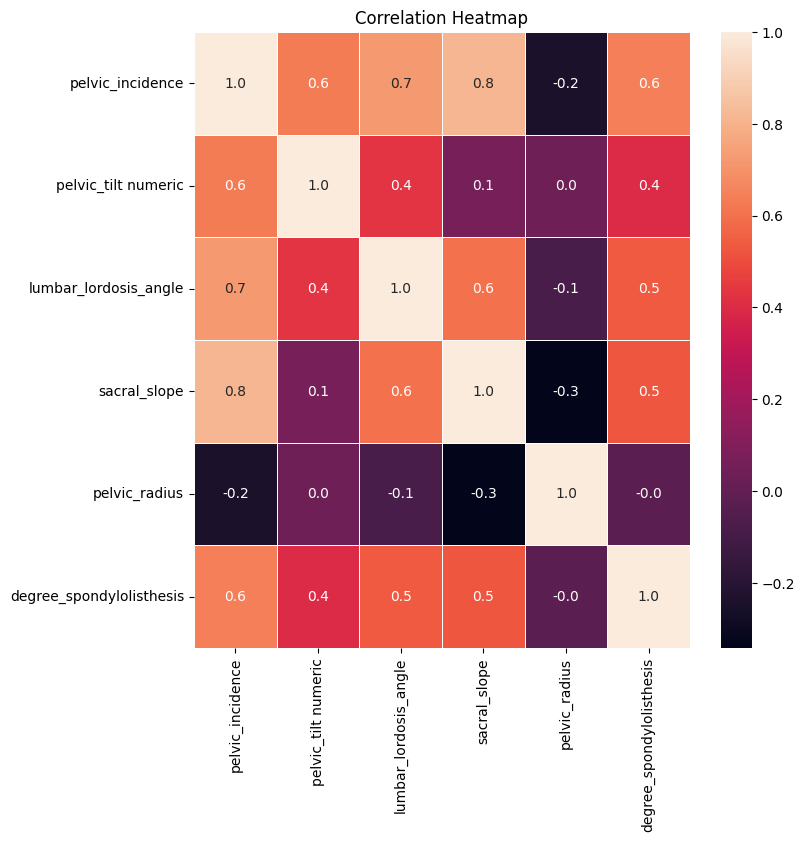

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(df.drop('class', axis=1).corr(), annot=True, linewidths='0.7', fmt=".1f", ax=ax)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title('Correlation Heatmap')
plt.show()

# **Define Dependent and Independent Features**

In [14]:
X = df.drop(['class'], axis = 1)
y = df['class']

# **Data Splitting**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217, 6), (93, 6), (217,), (93,))

# **Modelling**

In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
KNeighborsClassifier()

KNeighborsClassifier()

# **Predict**

In [19]:
y_pred = knn.predict(X_test)

In [22]:
print(confusion_matrix(y_test, y_pred))

[[58 11]
 [ 8 16]]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.88      0.84      0.86        69
      Normal       0.59      0.67      0.63        24

    accuracy                           0.80        93
   macro avg       0.74      0.75      0.74        93
weighted avg       0.80      0.80      0.80        93



# **Tuning the best k**

In [24]:
error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

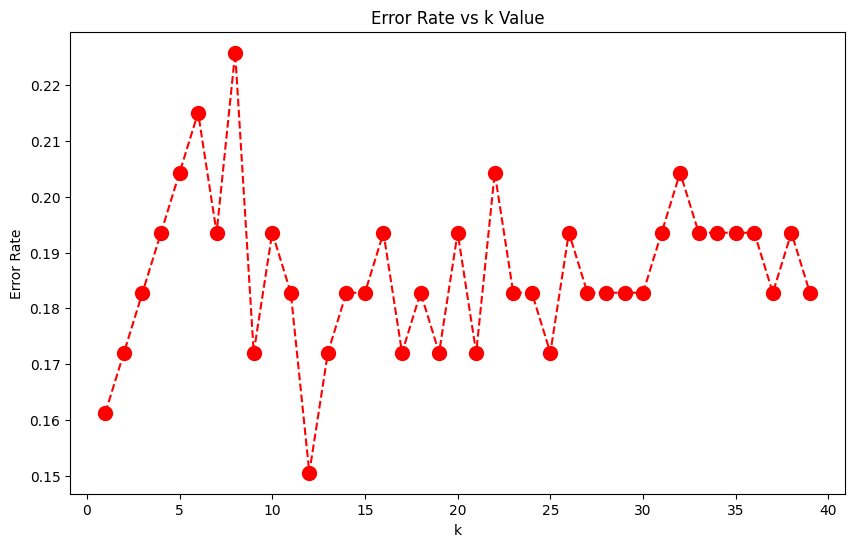

In [27]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markersize = 10)
plt.title('Error Rate vs k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

**Note**

The minimum error rate from the above graph that with the k = 12. Let's try !

# **Modelling After Tuning**

In [28]:
knn_12 = KNeighborsClassifier(n_neighbors = 12)
knn_12.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [29]:
KNeighborsClassifier(n_neighbors = 12)

KNeighborsClassifier(n_neighbors=12)

In [30]:
y_pred_12 = knn_12.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred_12))

[[61  8]
 [ 6 18]]


In [33]:
print(classification_report(y_test, y_pred_12))

              precision    recall  f1-score   support

    Abnormal       0.91      0.88      0.90        69
      Normal       0.69      0.75      0.72        24

    accuracy                           0.85        93
   macro avg       0.80      0.82      0.81        93
weighted avg       0.85      0.85      0.85        93

